In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [62]:
train_data='D:/My Personal Documents/Learnings/Data Science/Data Sets/Big Mart Sale/Train_UWu5bXk.csv'
test_data='D:/My Personal Documents/Learnings/Data Science/Data Sets/Big Mart Sale/Test_u94Q5KV.csv'
train=pd.read_csv(train_data)
test=pd.read_csv(test_data)

In [63]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print (train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


C:\Amrendra\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [65]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [66]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

C:\Amrendra\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


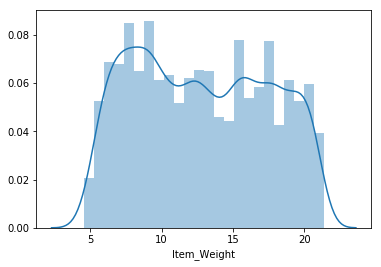

In [67]:
sb.distplot(data.Item_Weight[data.Item_Weight.isnull()==0])

In [68]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [69]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [70]:
pd.unique(data[['Outlet_Type','Outlet_Size']].values.ravel())

array(['Supermarket Type1', 'Medium', 'Supermarket Type2',
       'Grocery Store', nan, 'High', 'Supermarket Type3', 'Small'],
      dtype=object)

In [71]:
def fat_decode(fat):
    if(fat in ('low fat','LF')):
        return 'Low Fat'
    elif(fat=='reg'):
        return 'Regular'
    else:
        return fat

In [72]:
data.Item_Fat_Content=data.Item_Fat_Content.apply(fat_decode)

In [73]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [74]:
pd.DataFrame(data.corr()["Item_Outlet_Sales"].sort_values(ascending=False))

,Item_Outlet_Sales
Item_Outlet_Sales,1.000000
Item_MRP,0.567574
Item_Weight,0.014123
Outlet_Establishment_Year,-0.049135
Item_Visibility,-0.128625


In [75]:
data.loc[data.Item_Weight.isnull(),'Item_Weight']=data.Item_Weight.mean()

In [76]:
data.loc[data.Outlet_Size.isnull()==True,'Outlet_Size']='Medium'

In [77]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [78]:
data.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [79]:
data['Item_Type_Der']= data.Item_Identifier.apply(lambda x: x[0:2])

In [80]:
data['Item_Type_Der'].head()

0    FD
1    DR
2    FD
3    FD
4    NC
Name: Item_Type_Der, dtype: object

In [81]:
data['Item_Type_Der']=data['Item_Type_Der'].map({'FD':'Food','DR':'Drink','NC':'Non Consumable'})

In [82]:
data['Outlet_Age']=2013-data.Outlet_Establishment_Year

(array([4390., 3918., 2611., 1650.,  939.,  447.,  105.,   65.,   50.,
          29.]),
 array([0.        , 0.03283909, 0.06567819, 0.09851728, 0.13135638,
        0.16419547, 0.19703457, 0.22987366, 0.26271276, 0.29555185,
        0.32839095]),
 <a list of 10 Patch objects>)

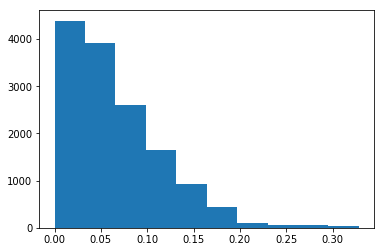

In [83]:
plt.hist(data.Item_Visibility)

In [84]:
data=data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1)

In [85]:
data=pd.get_dummies(data,columns=['Item_Fat_Content','Item_Type_Der','Outlet_Location_Type','Outlet_Size','Outlet_Type'])

In [86]:
data.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,source,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,train,14,1,0,...,1,0,0,0,1,0,0,1,0,0
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,train,4,0,1,...,0,0,1,0,1,0,0,0,1,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,train,14,1,0,...,1,0,0,0,1,0,0,1,0,0
3,FDX07,182.0950,732.3800,0.000000,19.20,OUT010,train,15,0,1,...,0,0,1,0,1,0,1,0,0,0
4,NCD19,53.8614,994.7052,0.000000,8.93,OUT013,train,26,1,0,...,0,0,1,1,0,0,0,1,0,0


In [87]:
train=data[data.source=='train']
test=data[data.source=='test']
train=train.drop('source',axis=1)
test=test.drop('source',axis=1)

In [88]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
#predictors = [x for x in train.columns if x not in [target]+IDcol]
predictors=['Item_MRP','Outlet_Type_Grocery Store','Outlet_Type_Supermarket Type3','Outlet_Age','Item_Visibility','Outlet_Type_Supermarket Type1','Item_Weight','Outlet_Type_Supermarket Type2']

In [89]:
y_train=train[target]
x_train=train[predictors].values
x_test=test[predictors].values

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import model_selection, metrics
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'bootstrap': [True],
    'max_depth': [3,4,5,6,7,8,9],
    'max_features':[3,4,5,6],
    'min_samples_leaf':[0.001,0.01,0.1],
    'min_samples_split':[0.001,0.01,0.1],
    'n_estimators': [100,150,200,300,500] 
}

rf=RandomForestRegressor()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=4,n_jobs=-1,verbose=2)

grid_search.fit(x_train,y_train)
#print(grid_search.best_params_)

print(grid_search.best_params_)

In [90]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,
                                bootstrap=True,
                                max_depth=6,
                                max_features=6,
                                min_samples_split=.01,
                                min_samples_leaf=.001,
                                random_state=0)
rf.fit(x_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.001,
           min_samples_split=0.01, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [91]:
y_pred=rf.predict(x_test)

In [93]:
pd.DataFrame(y_pred).to_csv('Submission.csv')